<a href="https://colab.research.google.com/github/ksetdekov/ml_dpo_2021/blob/master/hw/hw2/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №2

Задание выполнил: ```(Кирилл Сетдеков)```

### Общая информация

__Дата выдачи:__ 25.04.2021

__Дедлайн:__ 05.05.2021 23:59

# О задании

В этом домашнем задании вы реализуете градиентный спуск и стохастический градиентный спуск для обучения линейной регрессии, попрактикуетесь в анализе данных и их обработке, а также примените модели линейной регрессии на практике и проанализируете результаты.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.


### Оценивание и штрафы


#### Gradient Descent [8 баллов]
* [Задание 1](#task1) [1 балл]
* [Задание 2](#task2) [2 балла]
* [Задание 3](#task3) [3 балла]
* [Задание 4](#task4) [2 балла]

#### Linear Regression [8 баллов] + 2 бонусных
* [Задание 1](#task21) [1 балл]
* [Задание 2](#task22) [1 балл]
* [Задание 3](#task23) [1 балл]
* [Задание 4](#task24) [1 балл]
* [Задание 5](#task25) [1 балл]
* [Задание 6](#task26) [1 балл]
* [Задание 7](#task27) [1 балл]
* [Задание 8](#task28) [1 балл]
* [Задание 9](#task29) [2 баллa]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{16},$$ где $s$ - сумма набранных балов. С учетом бонусов, за домашнее задание можно получить > 10 балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/811). 

## Часть 1. Gradient Descent

Среднеквадратичная ошибка на всем датасете $(X, y) = \{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ для линейной регрессии с вектором весов $w$ (в предположении, что в данных есть единичный признак) представляется следующим образом:

$$
Q(w) = \frac{1}{\ell}\|Xw - y\|_2^2
$$

Градиент данного функционала потерь по $w$:

$$
\nabla_w Q(w) = \frac{2}{\ell}X^T(Xw - y)
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Для тестирования реализованных вами методов будет использоваться датасет о ценах домов из `sklearn`.

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# загружаем данные
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# делим данные на обучающую и тестовую часть
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

### Задание 1 <a id="task1"></a>

С линейной регрессией удобно работать в матрично-векторном виде, если предположить, что в данных есть единичный признак. Реализуйте функцию, которая принимает на вход матрицу объекты-признаки, и добавляет в нее столбец (первый), заполненный единицами. Примените написанную функцию к обучающей и тестовой части имеющихся данных.

Например, если на вход подается матрица 
$$
\begin{pmatrix}
2 & 4 & 4200\\
0 & 10 & 5000\\
2 & 2 & 1000\\
\end{pmatrix},
$$
то на выходе будет матрица
$$
\begin{pmatrix}
1 & 2 & 4 & 4200\\
1 & 0 & 10 & 5000\\
1 & 2 & 2 & 1000\\
\end{pmatrix}$$

**Hint** 
- Вам могут пригодиться функции `np.concatenate`, `np.ones`

In [4]:
# create function
def add_identity_feature(X):
    '''
    INPUT:
    X - np.array shape=(ℓ, d-1)
    
    OUTPUT:
    X - np.array shape=(ℓ, d)
    '''
    leftmost = np.ones((X.shape[0], 1))
    X = np.append(leftmost, X, axis=1)
    return X

X_train = add_identity_feature(X_train)
X_test = add_identity_feature(X_test)


In [5]:
# test yourself
assert X_train.shape == (354, 14)
assert len(X_train) == X_train.sum(axis=0)[0]

assert X_test.shape == (152, 14)
assert len(X_test) == X_test.sum(axis=0)[0]

### Задание 2 <a id="task2"></a>

Реализуйте подсчет среднеквадратичной функции потерь и ее градиента по весам. Формулы должны быть реализованы в явном виде с помощью `numpy`, без использования циклов `for`.

**Hint** 
- Для умножения матрицы на вектор (или матрицы на матрицу) можно использовать функцию `np.dot`. 
- Не забывайте, что оператор `*` используется только для поэлементного умножения.
- Также может пригодиться функция `np.linalg.norm`

In [31]:
def mse_loss(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    loss - scalar
    """
    
    y_hat = X @ w
    loss = np.linalg.norm(y - y_hat)
    loss = (loss**2) / X.shape[0]

    return loss


def mse_grad(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    grad - np.array shape=(d,)
    """

    grad = (2/ X.shape[0]) *( X.T @ X @ w - X.T @ y)
    return grad

Посчитайте `result_mse_sklearn` используя функцию `mean_squared_error` из sklearn, чтобы сравнить c результатом вашей функции

In [34]:
from sklearn.metrics import mean_squared_error

w = np.zeros(X_train.shape[1])

result_mse_custom = mse_loss(X_train, y_train, w)
result_mse_grad = mse_grad(X_train, y_train, w)


result_mse_sklearn = mean_squared_error(y_train, np.dot(X_train,w))

assert (X_train @ w).shape == y_train.shape
assert np.allclose(result_mse_custom, result_mse_sklearn)
assert np.allclose(result_mse_grad, np.array([-43.9424,  -99.9887, -675.8766, -444.0919,   -3.0395,  
                                              -23.5569,   -282.6831,  -2829.3631,   -177.206 ,  -373.6983,
                                              -16820.8966,   -796.6377, -16136.5175,   -477.6308]),rtol=1e-03)

### Задание 3  <a id="task3"></a>

Реализуйте класс для линейной регрессии. Он должен поддерживать обучение с помощью градиентного спуска (метод `fit`) и предсказание для выборки (метод `predict`).

Метод `fit` должен возвращать список из значений функционала потерь на каждой итерации градиентного спуска. Напомним, что алгоритм градиентного спуска состоит из трех этапов:

1. **Инициализация.** В данном случае вектор весов вы можете инициализировать нулями.
2. **Шаг градиентного спуска.** Обновление весов с помощью антиградиента функционала потерь с заданной длиной шага (параметр `eta`). 
$$
w^{t+1} = w^t - \eta \nabla Q(w^t)
$$
Для того, чтобы нарисовать график зависимости значения функционала потерь от номера итерации, необходимо на каждом шаге запоминать значение функционала потерь (обновлять список `self.loss_history`). На этом этапе вы можете использовать уже реализованные вами функции `mse_loss` и `mse_grad` из предыдущего задания.

3. **Остановка.** В качестве критерия останова используйте $\|w^t - w^{t - 1}\| < \varepsilon$ (значение $\varepsilon$ задается параметром `tol`). В качестве дополнительного критерия останова используйте максимальное число итераций (параметр `max_iter`). Таким образом, даже если первый критерий не сработает, алгоритм все равно остановится после `max_iter` шагов.

In [35]:
class CustomLinearRegressionGD:
    def __init__(self):
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y, max_iter=100, tol=1e-6, eta=1e-6):
        """
        ARGUMENTS:
        max_iter - максимальное число шагов градиентного спуска
        tol - значение эпсилон для критерия останова
        eta - длина шага градиентного спуска (learning rate)
        X - np.array of shape (ℓ, d)
        y - np.array of shape (ℓ,)
        
        OUTPUT:
        loss_hist - list 
        """
        
        self.w = np.zeros(X.shape[1])
        self.loss_history = [mse_loss(X, y, self.w)]
        for t in range(max_iter):
            next_w = self.w - eta * mse_grad(X, y, self.w)
            self.w = next_w 
            self.loss_history.append(mse_loss(X, y, self.w))
        
        return self.loss_history
        
    def predict(self, X):
        """
        ARGUMENTS:
        X_test - np.array of shape (ℓ, d)
        
        OUTPUT:
        y_pred - np.array of shape (ℓ,)
        """
        # your code here
        return y_pred

Проверьте работу вашего класса. 
- Обучите линейную регрессию на обучающей части выборки.
- Постройте график зависимости значения функционала потерь от итерации градиентного спуска. 
- Подберите вручную оптимальную длину шага градиентного спуска и посчитайте MSE на тестовой части с помощью функции `mean_squared_error` из `sklearn`. 
- Добейтесь того, чтобы значение MSE не превышало 100.

In [36]:
lr = CustomLinearRegressionGD()
lr.fit(X, y)

[592.1469169960475,
 196.24724722871895,
 136.88337490947555,
 124.94909597282222,
 119.97944663875393,
 116.28500716597888,
 113.04250375902105,
 110.11172393529547,
 107.45028015685948,
 105.03155379673996,
 102.83302819063091,
 100.8344831484161,
 99.01758452882862,
 97.36568339068513,
 95.86365760331825,
 94.49777133940988,
 93.25554791822812,
 92.12565437090629,
 91.09779659664525,
 90.1626241310744,
 89.3116436445309,
 88.53714036984591,
 87.83210673272926,
 87.19017752449857,
 86.60557101742577,
 86.07303547794999,
 85.587800582943,
 85.1455332895715,
 84.74229775050175,
 84.37451890361659,
 84.03894939940746,
 83.7326395600823,
 83.45291009247553,
 83.19732730232502,
 82.96368058061759,
 82.7499619537273,
 82.55434750816141,
 82.37518051807156,
 82.21095611943996,
 82.06030738915985,
 81.92199270022508,
 81.79488423605086,
 81.67795755766811,
 81.57028212727816,
 81.47101270049797,
 81.37938150766557,
 81.29469115187284,
 81.21630815802527,
 81.14365711324896,
 81.0762153444378

In [39]:
loss_history = lr.loss_history

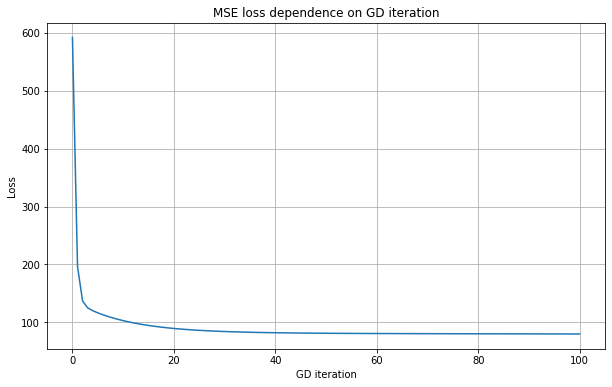

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
mse_test = mse_loss(X_test, y_test, lr.w)
print(mse_test)
assert len(loss_history) <= 1000
assert mse_test <= 100

93.86575118282471


### Задание 4 <a id="task4"></a>

Как известно, масштабирование данных может помочь в сходимости градиентного спуска (вспомните, почему). Отмасштабируйте имеющиеся данные с помощью мин-макс шкалирования:

$$
x^j = \frac{x^j - \min(x^j)}{\max(x^j) - \min(x^j)},
$$

где $x^j$ - это вектор значений признака.

Учтите, что единичный признак нормировать не надо (почему?). Так что либо придумайте способ, как отнормировать все столбцы, кроме единичного.

Примените линейную регрессию с градиентным спуском к данным, подберите оптимальную длину шага. Добейтесь того, чтобы значение MSE не превышало 100.

Опишите наблюдения. Изменилась ли ситуация?

In [ ]:
# scale the data
# your code here


# train linear regression with gradient descent
lr_scaled = CustomLinearRegressionGD()
# your code here

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on SGD iteration')
plt.xlabel('SGD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

``` Опишите свои наблюдения.```

In [ ]:
mse_test = mse_loss(X_test_scaled, y_test, lr_scaled.w)
print(mse_test)
assert mse_test <= 100

90.76566264251974


# Часть 2 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

Данные можно скачать [тут](https://raw.githubusercontent.com/WeaselCMC/ml_dpo_2021/master/hw/hw2/train.csv)

In [ ]:
data = pd.read_csv('train.csv', header=0)
data.drop('Id', axis=1, inplace=True)
data.shape

(1460, 80)

In [ ]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Задание 1 <a id="task21"></a>

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [ ]:
# your code here

``` Опишите свои наблюдения.```

### Задание 2 <a id="task22"></a>

Избавьтесь от пропусков. Заполните пропуски в колонках со значениями типа `object` (это можно проверить методом `.dtype` или `.dtypes`) отдельной категорией 'NaN', а в остальных (типа `float64` и `int64`) - средним по колонке.

Проверьте, что вы действительно избавились от пропусков.

In [ ]:
# your code here

### Задание 3 <a id="task23"></a>

Для каждой колонки, выраженной числами (типа `float64` и `int64`), постройте гистограмму ее значений. Сильно ли отличается масштаб признаков? Отмасштабируйте признаки каким-нибудь методом (например, `StandardScaler` или `MinMaxScaler` из `sklearn`). 

**Не забудьте, что целевая переменная (столбец `'SalePrice'`) не входит в признаки!**

In [ ]:
# your code here

### Задание 4 <a id="task24"></a>

Обработайте категориальные признаки. Примените к ним one-hot кодирование. Сколько получилось колонок у итогового датасета?

In [ ]:
# your code here

### Задание 5 <a id="task25"></a>

- Постройте гистограмму распределения предсказываемого значения. 
- Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `np.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. 
- Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

In [ ]:
# your code here

``` Опишите свои наблюдения.```

---
Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('SalePrice', axis=1), np.log1p(data['SalePrice']), random_state=13)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 79), (365, 79), (1095,), (365,))

### Задание 6 <a id="task26"></a>

Перейдем к построению моделей машинного обучения с помощью `sklearn`. Обучите модель линейной регрессии на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error (корень из MSE) на обучающей и валидационной выборках. Что вы наблюдаете? Как вы можете объяснить такой результат?

In [ ]:
# your code here

``` Опишите свои наблюдения.```

### Задание 7 <a id="task27"></a>

Теперь примените методы линейной регрессии с регуляризацией - Lasso (L1) и Ridge (L2). 

Для подбора коэффициента регуляризации будем использовать росс-валидацию (вспомните, что такое кросс-валидация и зачем она нужна). 

`GridSearchCV` - это метод, который перебирает значения гиперпараметров (по заданной «сетке»), считает для каждого качество на кросс-валидации и позволяет выбрать лучший гиперпараметр. Более подробно вы можете познакомиться с методом в [документаци](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

1. Прочитайте документацию `sklearn.model_selection.GridSearchCV`
2. Подбирите оптимальный гиперпараметр для LASSO:
    - В качестве сетки используйте `np.logspace(-5, 1)`
    - Используйте 5-Fold Cross-Validation
3. Используя оптимельное значение гиперпаметра обучите модель на всей обучающей выборке, посчитайте ошибку на тренировочной и обучающей выборках
4. Повторите п. 2-3 для модели Ridge

In [ ]:
# пример "сетки"
np.logspace(-5, 1)

array([1.00000000e-05, 1.32571137e-05, 1.75751062e-05, 2.32995181e-05,
       3.08884360e-05, 4.09491506e-05, 5.42867544e-05, 7.19685673e-05,
       9.54095476e-05, 1.26485522e-04, 1.67683294e-04, 2.22299648e-04,
       2.94705170e-04, 3.90693994e-04, 5.17947468e-04, 6.86648845e-04,
       9.10298178e-04, 1.20679264e-03, 1.59985872e-03, 2.12095089e-03,
       2.81176870e-03, 3.72759372e-03, 4.94171336e-03, 6.55128557e-03,
       8.68511374e-03, 1.15139540e-02, 1.52641797e-02, 2.02358965e-02,
       2.68269580e-02, 3.55648031e-02, 4.71486636e-02, 6.25055193e-02,
       8.28642773e-02, 1.09854114e-01, 1.45634848e-01, 1.93069773e-01,
       2.55954792e-01, 3.39322177e-01, 4.49843267e-01, 5.96362332e-01,
       7.90604321e-01, 1.04811313e+00, 1.38949549e+00, 1.84206997e+00,
       2.44205309e+00, 3.23745754e+00, 4.29193426e+00, 5.68986603e+00,
       7.54312006e+00, 1.00000000e+01])

In [ ]:
# your Lasso code here

In [ ]:
# your Ridge code here

### Задание 8 <a id="task28"></a>

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here

``` Опишите свои наблюдения.```

### Задание 9 (Бонус) <a id="task29"></a>


- Скачайте тестовые данные из соревнования [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=test.csv)
- Примените к ним те же шаги предобработки (заполнение пропусков, масштабирование, и т.д.)
- Выберите лучшую модель, которую вам удалось обучить и предскажите с ее помощью цену 
- На забудьте, что ваша модель предсказывает логарифм (см. Задание 5), так что нужно применить обраное преобразование
- Загрузите ваши прогнозы на Kaggle (`Submit Prediction`) и узнайте их точность. 

In [ ]:
# your code here